In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [44]:
# dataset used in previous group exercise is loaded
dataset_path = '/content/f_dataset.csv'
df = pd.read_csv(dataset_path)

In [45]:
# printing the first 5 rows
print(df.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  37.454012  95.071431  73.199394  59.865848  15.601864  15.599452   
1  60.754485  17.052412   6.505159  94.888554  96.563203  80.839735   
2  38.867729  27.134903  82.873751  35.675333  28.093451  54.269608   
3  11.959425  71.324479  76.078505  56.127720  77.096718  49.379560   
4  80.744016  89.609130  31.800347  11.005192  22.793516  42.710779   

   feature_7  feature_8  feature_9  feature_10  ...  feature_22  feature_23  \
0   5.808361  86.617615  60.111501   70.807258  ...   13.949386   29.214465   
1  30.461377   9.767211  68.423303   44.015249  ...   77.513282   93.949894   
2  14.092422  80.219698   7.455064   98.688694  ...   62.329813   33.089802   
3  52.273283  42.754102   2.541913   10.789143  ...   16.122129   92.969765   
4  81.801477  86.073058   0.695213   51.074730  ...   25.178230   49.724851   

   feature_24  feature_25  feature_26  feature_27  feature_28  feature_29  \
0   36.636184   45.60

In [46]:
# Checking for missing values and handleling them
print(df.isnull().sum())

feature_1        0
feature_2        0
feature_3        0
feature_4        0
feature_5        0
feature_6        0
feature_7        0
feature_8        0
feature_9        0
feature_10       0
feature_11       0
feature_12       0
feature_13       0
feature_14       0
feature_15       0
feature_16       0
feature_17       0
feature_18       0
feature_19       0
feature_20       0
feature_21       0
feature_22       0
feature_23       0
feature_24       0
feature_25       0
feature_26       0
feature_27       0
feature_28       0
feature_29       0
feature_30       0
critical_temp    0
dtype: int64


In [47]:
# Replace missing values using mean
df.fillna(df.mean(), inplace=True)
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
feature_1        0
feature_2        0
feature_3        0
feature_4        0
feature_5        0
feature_6        0
feature_7        0
feature_8        0
feature_9        0
feature_10       0
feature_11       0
feature_12       0
feature_13       0
feature_14       0
feature_15       0
feature_16       0
feature_17       0
feature_18       0
feature_19       0
feature_20       0
feature_21       0
feature_22       0
feature_23       0
feature_24       0
feature_25       0
feature_26       0
feature_27       0
feature_28       0
feature_29       0
feature_30       0
critical_temp    0
dtype: int64


In [48]:
# Splitting dataset into features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Convert target variable to binary for classification
y_binary = (y > np.median(y)).astype(int)

In [49]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.25, random_state=123)

In [50]:
# 1. Tree Models
# a) Decision Tree Classifier
dtree_model = DecisionTreeClassifier(random_state=123)
dtree_model.fit(X_train, y_train)
pred_dtree = dtree_model.predict(X_test)
print("\nDecision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, pred_dtree):.2f}")
print(f"Precision: {precision_score(y_test, pred_dtree):.2f}")
print(f"Recall: {recall_score(y_test, pred_dtree):.2f}")
print(f"F1 Score: {f1_score(y_test, pred_dtree):.2f}")

# b) Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=150, random_state=123)
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, pred_rf):.2f}")
print(f"F1 Score: {f1_score(y_test, pred_rf):.2f}")

# c) Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=150, random_state=123)
gb_model.fit(X_train, y_train)
pred_gb = gb_model.predict(X_test)
print("\nGradient Boosting Performance:")
print(f"Accuracy: {accuracy_score(y_test, pred_gb):.2f}")
print(f"Precision: {precision_score(y_test, pred_gb):.2f}")
print(f"Recall: {recall_score(y_test, pred_gb):.2f}")
print(f"F1 Score: {f1_score(y_test, pred_gb):.2f}")


Decision Tree Performance:
Accuracy: 0.46
Precision: 0.48
Recall: 0.43
F1 Score: 0.45

Random Forest Performance:
Accuracy: 0.47
Precision: 0.48
Recall: 0.39
F1 Score: 0.43

Gradient Boosting Performance:
Accuracy: 0.49
Precision: 0.51
Recall: 0.41
F1 Score: 0.46


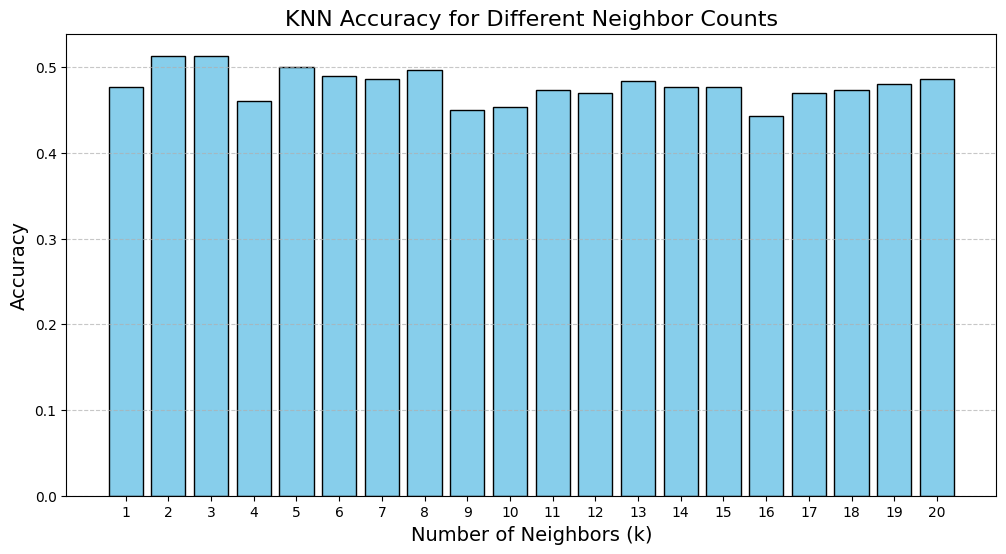


Optimal number of neighbors for KNN: 2


In [51]:
# 2) KNN Model
neighbor_values = range(1, 21)
performance_scores = []

# Evaluate KNN for varying k
for neighbors in neighbor_values:
    knn_model = KNeighborsClassifier(n_neighbors=neighbors)
    knn_model.fit(X_train, y_train)
    score = accuracy_score(y_test, knn_model.predict(X_test))
    performance_scores.append(score)

# visualization
plt.figure(figsize=(12, 6))
plt.bar(neighbor_values, performance_scores, color='skyblue', edgecolor='black')
plt.title('KNN Accuracy for Different Neighbor Counts', fontsize=16)
plt.xlabel('Number of Neighbors (k)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(neighbor_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Optimal k
optimal_neighbors = neighbor_values[np.argmax(performance_scores)]
print(f"\nOptimal number of neighbors for KNN: {optimal_neighbors}")

In [52]:
# Train and evaluate KNN with optimal k
best_knn_model = KNeighborsClassifier(n_neighbors=optimal_neighbors)
best_knn_model.fit(X_train, y_train)
optimal_knn_pred = best_knn_model.predict(X_test)

print("\nOptimal KNN Performance:")
print(f"Accuracy: {accuracy_score(y_test, optimal_knn_pred):.2f}")
print(f"Precision: {precision_score(y_test, optimal_knn_pred):.2f}")
print(f"Recall: {recall_score(y_test, optimal_knn_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, optimal_knn_pred):.2f}")


Optimal KNN Performance:
Accuracy: 0.51
Precision: 0.57
Recall: 0.23
F1 Score: 0.33


In [53]:
# end summary of exercise day 8
print("\n--- Model Summary ---")
print("Decision Tree Accuracy:", accuracy_score(y_test, pred_dtree))
print("Random Forest Accuracy:", accuracy_score(y_test, pred_rf))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, pred_gb))
print("Optimal KNN Accuracy:", accuracy_score(y_test, optimal_knn_pred))


--- Model Summary ---
Decision Tree Accuracy: 0.4633333333333333
Random Forest Accuracy: 0.4666666666666667
Gradient Boosting Accuracy: 0.49
Optimal KNN Accuracy: 0.5133333333333333
